In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [2]:
comparison_df = pd.DataFrame({
    "Model": ["CNN", "ResNet50", "DenseNet121"],
    "Test Accuracy": [0.75, 0.75, 0.8958]
})

comparison_df


,Model,Test Accuracy
0,CNN,0.7500
1,ResNet50,0.7500
2,DenseNet121,0.8958


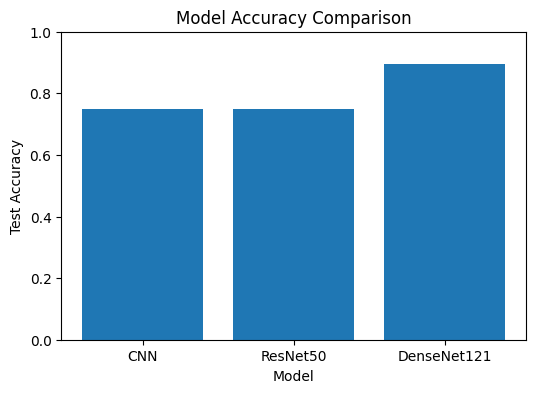

In [3]:
plt.figure(figsize=(6,4))
plt.bar(
    comparison_df["Model"],
    comparison_df["Test Accuracy"]
)
plt.ylim(0, 1)
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [4]:
model_path = "../models/best_densenet121.h5"
model = load_model(model_path)

print("DenseNet121 model loaded successfully!")




DenseNet121 model loaded successfully!


In [5]:
class_indices = {
    "Covid": 0,
    "Normal": 1,
    "Viral Pneumonia": 2
}

inv_map = {v: k for k, v in class_indices.items()}
print(inv_map)


{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [6]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)[0]

    predicted_index = np.argmax(preds)
    predicted_class = inv_map[predicted_index]
    confidence = preds[predicted_index] * 100

    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{predicted_class} ({confidence:.1f}%)")
    plt.show()

    return predicted_class, confidence


1/1 [==============================] - 3s 3s/step
Predicted Class: Covid
Confidence: 55.83%


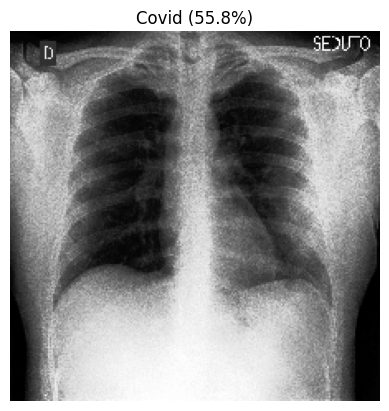

('Covid', 55.83226680755615)

In [8]:
sample_image_path = "../data/processed/test/Covid/02.jpeg"
predict_image(sample_image_path)


1/1 [==============================] - 0s 265ms/step
Predicted Class: Covid
Confidence: 99.36%


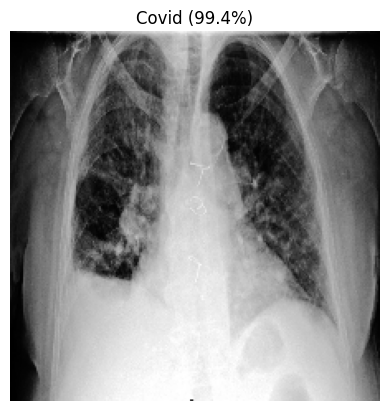

1/1 [==============================] - 0s 220ms/step
Predicted Class: Normal
Confidence: 93.71%


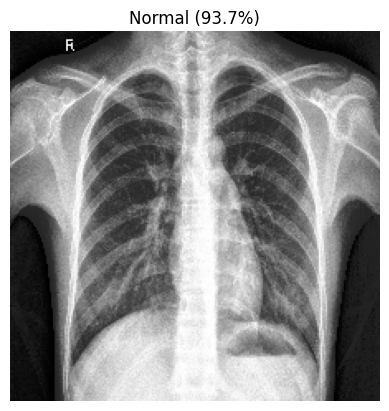

1/1 [==============================] - 0s 218ms/step
Predicted Class: Viral Pneumonia
Confidence: 60.18%


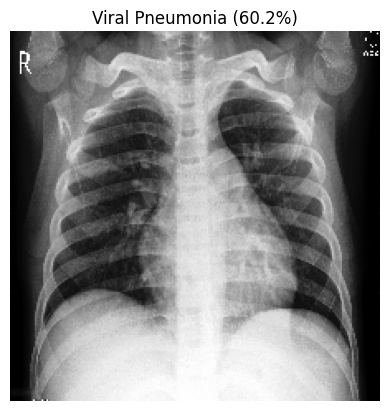

In [9]:
test_images = [
    "../data/processed/test/Covid/039.jpeg",
    "../data/processed/test/Normal/012.jpeg",
    "../data/processed/test/Viral Pneumonia/02.jpeg"
]

for img_path in test_images:
    predict_image(img_path)
